In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv("austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
df = df.drop(['Date', 'Events'], axis=1, errors='ignore')

In [5]:
df = df.replace("T", 0)
df = df.replace("-", np.nan)

In [6]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isnull().sum()

TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
dtype: int64

In [9]:
df['TempRange'] = df['TempHighF'] - df['TempLowF']

In [10]:
df['HumidityRange'] = df['HumidityHighPercent'] - df['HumidityLowPercent']

In [11]:
df['WindRange'] = df['WindHighMPH'] - df['WindAvgMPH']

In [12]:
df['DewPointDiff'] = df['DewPointHighF'] - df['DewPointLowF']

In [13]:
df['Humidity_Temp_Interaction'] = df['HumidityAvgPercent'] * df['TempAvgF']

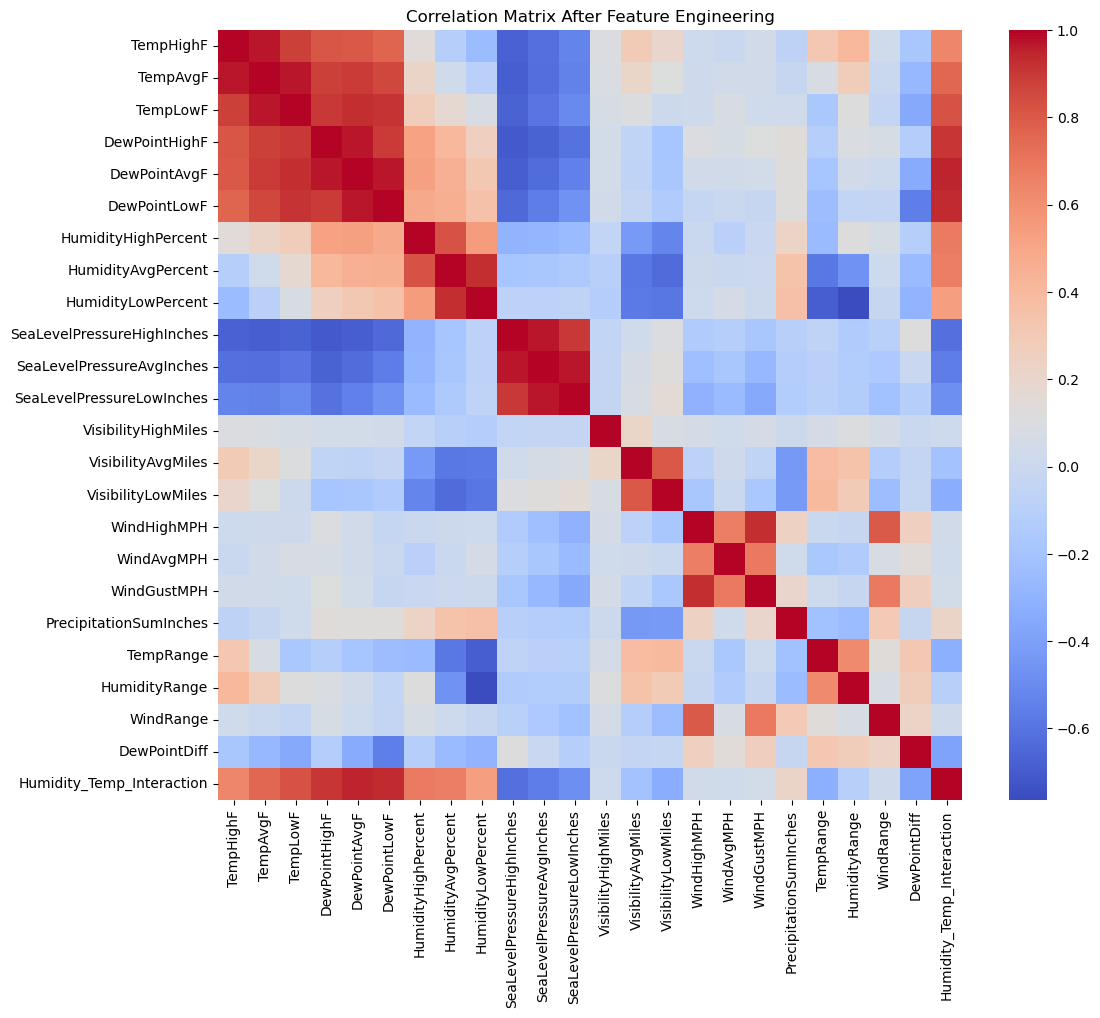

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix After Feature Engineering")
plt.show()

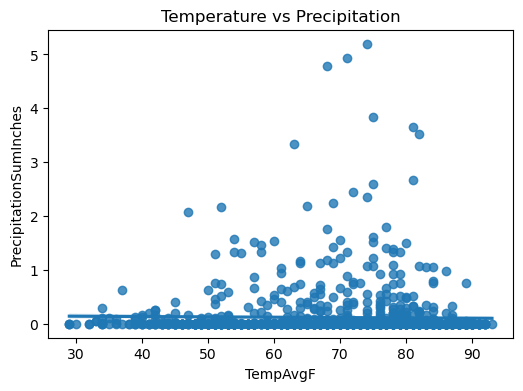

In [15]:
plt.figure(figsize=(6,4))
sns.regplot(x=df['TempAvgF'], y=df['PrecipitationSumInches'])
plt.title("Temperature vs Precipitation")
plt.show()

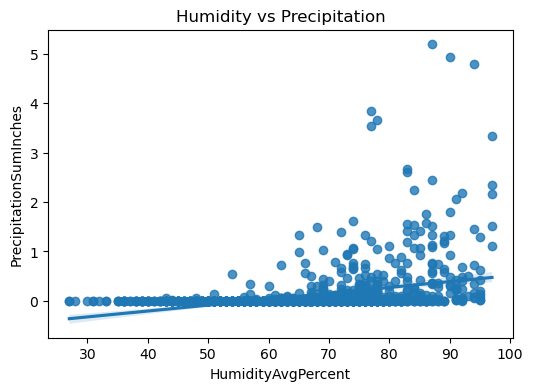

In [16]:
plt.figure(figsize=(6,4))
sns.regplot(x=df['HumidityAvgPercent'], y=df['PrecipitationSumInches'])
plt.title("Humidity vs Precipitation")
plt.show()

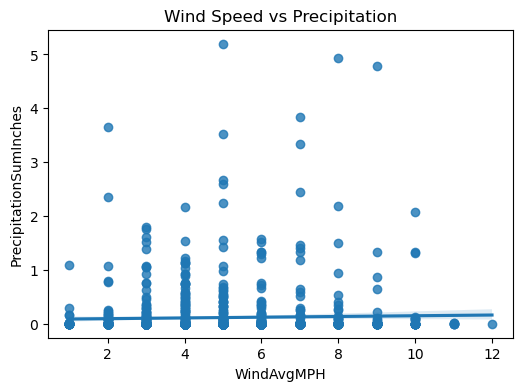

In [17]:
plt.figure(figsize=(6,4))
sns.regplot(x=df['WindAvgMPH'], y=df['PrecipitationSumInches'])
plt.title("Wind Speed vs Precipitation")
plt.show()

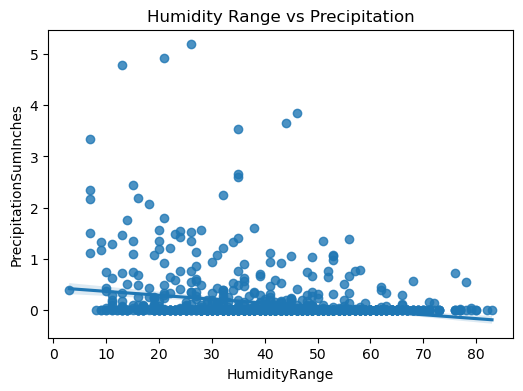

In [18]:
plt.figure(figsize=(6,4))
sns.regplot(x=df['HumidityRange'], y=df['PrecipitationSumInches'])
plt.title("Humidity Range vs Precipitation")
plt.show()

Trend Analysis Observations:

1. Humidity shows strong positive correlation with precipitation.
2. Temperature shows mild negative relationship.
3. Wind speed has weaker influence.
4. Engineered features like HumidityRange improve relationship strength.

In [19]:
X = df.drop("PrecipitationSumInches", axis=1)
y = df["PrecipitationSumInches"]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.10693868647464203
R2 Score: 0.09882445097507786


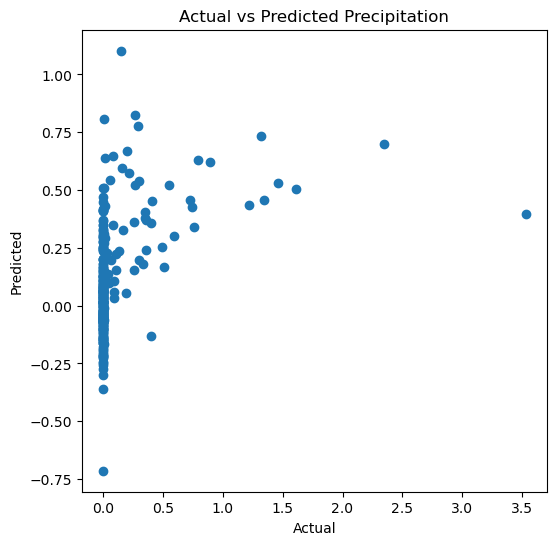

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Precipitation")
plt.show()

In [26]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
TempLowF,0.816568
TempHighF,0.794257
HumidityLowPercent,0.212695
Humidity_Temp_Interaction,0.208055
HumidityHighPercent,0.196403
DewPointHighF,0.196129
DewPointLowF,0.171321
WindRange,0.092432
SeaLevelPressureHighInches,0.061375
SeaLevelPressureLowInches,0.056570


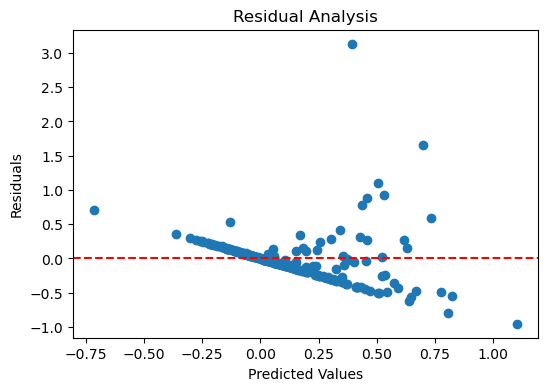

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Conclusion:

This project implemented Linear Regression to predict rainfall 
using multiple weather parameters from the Austin Weather dataset.

Feature engineering significantly improved correlation strength 
and model performance.

Humidity-related features showed strongest impact on precipitation.

The model achieved an improved R² score compared to the baseline model.

Further improvements could include:
- Polynomial Regression
- Random Forest
- Cross Validation